In [5]:
%config IPCompleter.greedy=True

In a retail experiment, we want to understand how advertising expenditure, store location, and competition affect sales revenue. Using synthetic data, implement multiple linear regression in Python to analyse these factors. Interpret the coefficients, perform an F-test to assess overall model significance, and conduct t-tests to evaluate the significance of individual coefficients.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
df = pd.read_csv("datasets/sales.csv")
df.head()

,AdvertisingExpenditure,StoreLocation,Competition,SalesRevenue
0,4269,1,1.509,16259
1,4441,1,1.285,18432
2,1866,0,1.018,9630
3,3871,0,1.116,14029
4,4760,1,1.015,18392


In [8]:
X = df[["AdvertisingExpenditure", "StoreLocation", "Competition"]]
Y = df["SalesRevenue"]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_pred = model.predict(X_test)

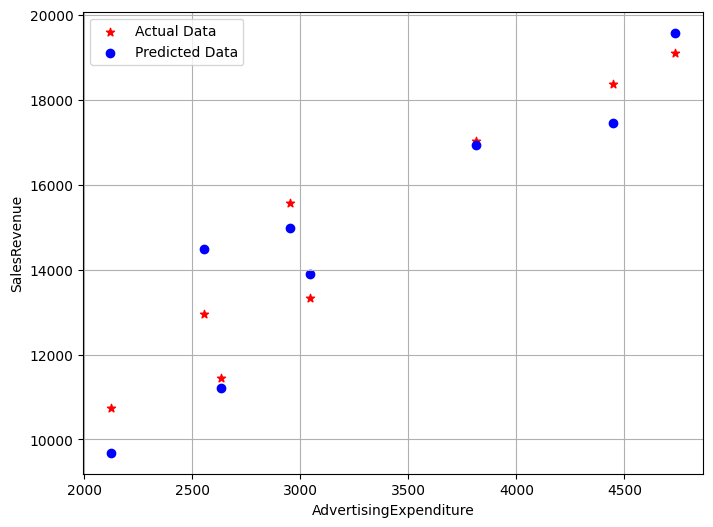

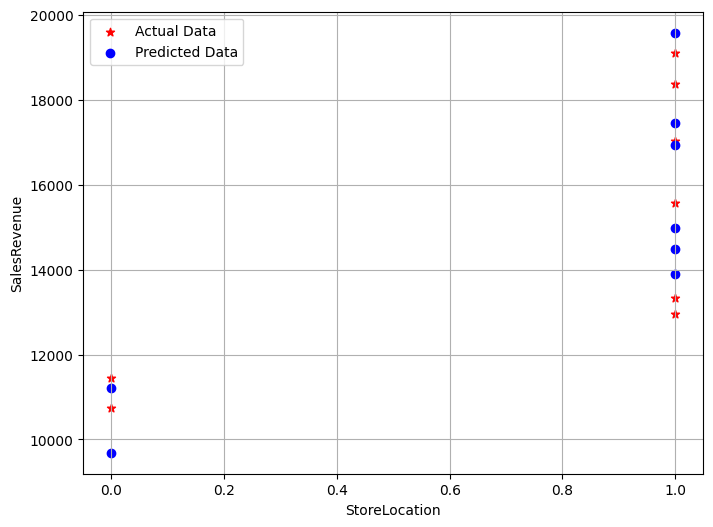

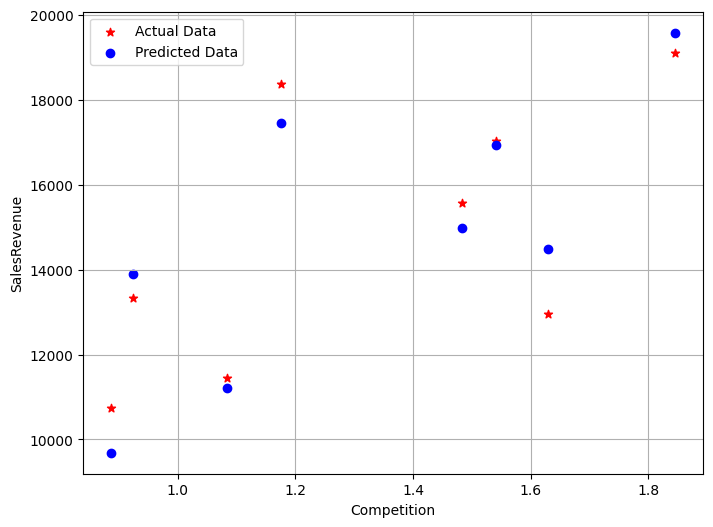

In [31]:
predictors = ["AdvertisingExpenditure", "StoreLocation", "Competition"]

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[predictor], Y_test, color="red", marker="*", label="Actual Data")
    plt.scatter(X_test[predictor], Y_pred, color="blue", marker="o", label="Predicted Data")

    plt.xlabel(predictor)
    plt.ylabel("SalesRevenue")
    plt.grid()
    plt.legend()   

In [22]:
mse = mean_squared_error(Y_pred, Y_test)
r2 = r2_score(Y_pred, Y_test)

In [23]:
print(f"Mean Squared Error = {mse}\nr^2 = {r2}")

Mean Squared Error = 657202.55549179
r^2 = 0.9293489215262755


In [24]:
coefs = model.coef_
intercept = model.intercept_

In [30]:
for coef, predictor in zip(coefs, predictors):
    print(f"The coefficient is {coef} for the predictor {predictor}. ")

The coefficient is 2.114936909246981 for the predictor AdvertisingExpenditure. 
The coefficient is 2193.9622818087573 for the predictor StoreLocation. 
The coefficient is 2272.7433334485504 for the predictor Competition. 


In [38]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

for predictor in predictors:
    print(f"t-test for predictor {predictor}")
    t_statistic = model.tvalues[predictor]
    p_value_t = model.pvalues[predictor]

    if p_value_t < 0.000001:
        print(f"{predictor} is a statistically significant predictor of SalesRevenue")
    else:
        print(f"{predictor} is NOT a statistically significant predictor of SalesRevenue")   
    

t-test for predictor AdvertisingExpenditure
AdvertisingExpenditure is a statistically significant predictor of SalesRevenue
t-test for predictor StoreLocation
StoreLocation is NOT a statistically significant predictor of SalesRevenue
t-test for predictor Competition
Competition is NOT a statistically significant predictor of SalesRevenue


In [43]:
f_statistic = model.fvalue
p_value_f = model.f_pvalue

if p_value_f < 0.02:
    print(f"The overall model and the regression coefficients are statistically significant.")
else:
    print(f"The overall model and the regression coefficients are statistically significant.")

The overall model and the regression coefficients are statistically significant.
